### Carga de Librerías

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import modulos as mod
import preprocessors as pp
from sklearn.preprocessing import StandardScaler

C:\Users\Ferickcen\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Carga de Dataset

In [2]:
data = pd.read_csv('supermarket_sales.csv', sep = ",", encoding='latin-1')
dataset = data

In [3]:
#dataset = dataset.drop(['Q'], axis=1)

In [4]:
dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
dataset.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Variables Numéricas

In [7]:
mod.getNumColNames(dataset)

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

#### Variables Categóricas

In [8]:
mod.getCatColNames(dataset)

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

### Variables Numéricas con Faltantes

In [9]:
cols_num_con_nan = mod.getNumNanColNames(dataset)
cols_num_con_nan

[]

#### No hay columnas numéricas con faltantes

### Imputación de Columnas Numéricas que contienen Nan

In [10]:
for col in cols_num_con_nan:
    pp.imputVN(dataset, col ,"Quantity")

### Columnas Categóricas con Nan menor a 5%

In [11]:
cols_cca = mod.getNanGoodColsNames(dataset, 0.05)
cols_cca

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

### Aplicación de CCA para columnas Categoricas con Nan 

In [12]:
dataset_temp = dataset[cols_cca].dropna()

In [13]:
dataset_temp.shape, dataset.shape

((1000, 17), (1000, 17))

In [14]:
dataset_vn = dataset_temp

### Determinación de columnas categoricas con NaN mayor a 5%

In [15]:
cols_cat_con_nan = mod.getCatNanColNames(dataset_vn)
cols_cat_con_nan

[]

#### No hay variables categoricas con nan

### Función Imputación de Variables Categóricas con Missings

In [16]:
for col in cols_cat_con_nan:
    pp.ImpVC(dataset_vn)

In [17]:
dataset_vc = dataset_vn
dataset_vc

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### Codificación Variables Categóricas

In [18]:
cat_cols = mod.getCategoryVars(dataset_vc)
cat_cols

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

#### Imputación por Frequency Encoding

In [19]:
for col in cat_cols:
    pp.executeFreqEncoding(dataset_vc, map_type='freq')

In [20]:
dataset_cvc = dataset_vc
dataset_cvc

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,1.0,340.0,340.0,501.0,501.0,152.0,74.69,7,26.1415,548.9715,12.0,2.0,345.0,522.83,4.761905,26.1415,9.1
1,1.0,328.0,328.0,499.0,501.0,170.0,15.28,5,3.8200,80.2200,11.0,2.0,344.0,76.40,4.761905,3.8200,9.6
2,1.0,340.0,340.0,499.0,499.0,160.0,46.33,7,16.2155,340.5255,14.0,3.0,311.0,324.31,4.761905,16.2155,7.4
3,1.0,340.0,340.0,501.0,499.0,152.0,58.22,8,23.2880,489.0480,14.0,1.0,345.0,465.76,4.761905,23.2880,8.4
4,1.0,340.0,340.0,499.0,499.0,166.0,86.31,7,30.2085,634.3785,12.0,3.0,345.0,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,328.0,328.0,499.0,499.0,152.0,40.35,1,2.0175,42.3675,12.0,3.0,345.0,40.35,4.761905,2.0175,6.2
996,1.0,332.0,332.0,499.0,501.0,160.0,97.38,10,48.6900,1022.4900,18.0,5.0,345.0,973.80,4.761905,48.6900,4.4
997,1.0,340.0,340.0,501.0,499.0,174.0,31.84,1,1.5920,33.4320,13.0,4.0,344.0,31.84,4.761905,1.5920,7.7
998,1.0,340.0,340.0,499.0,499.0,160.0,65.82,1,3.2910,69.1110,11.0,2.0,344.0,65.82,4.761905,3.2910,4.1


In [21]:
dataset_cvc.dtypes

Invoice ID                 float64
Branch                     float64
City                       float64
Customer type              float64
Gender                     float64
Product line               float64
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                       float64
Time                       float64
Payment                    float64
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

### Transformación de Variables Numéricas

In [22]:
numeric_cont_vars = mod.getContinuesCols(dataset_cvc)
numeric_cont_vars

['Unit price', 'Tax 5%', 'Total', 'Date', 'cogs', 'gross income', 'Rating']

### Graficación de las variables para transformación

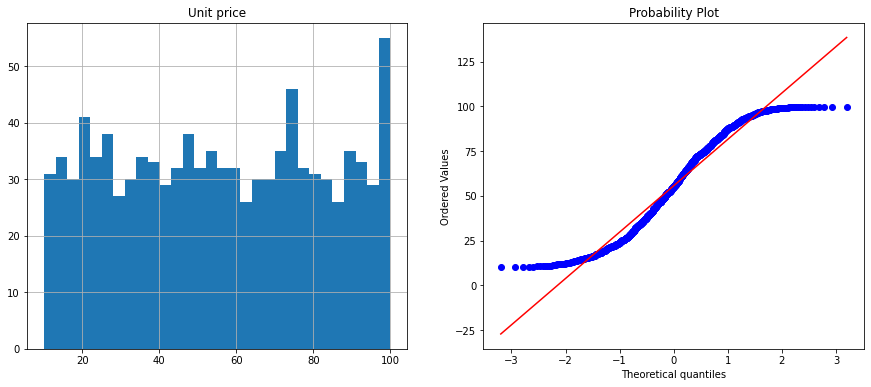

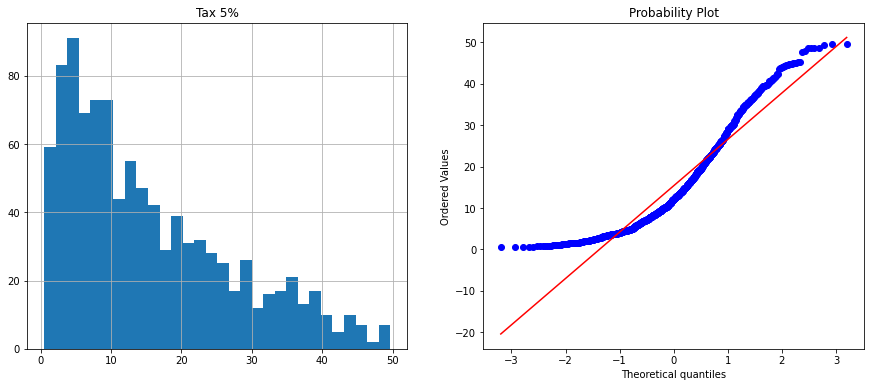

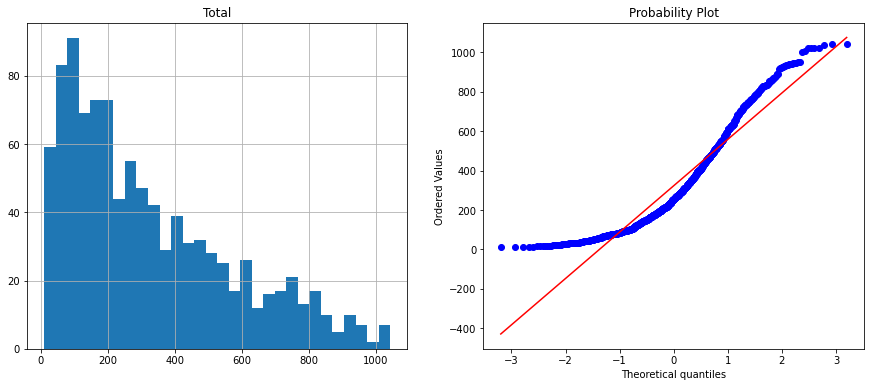

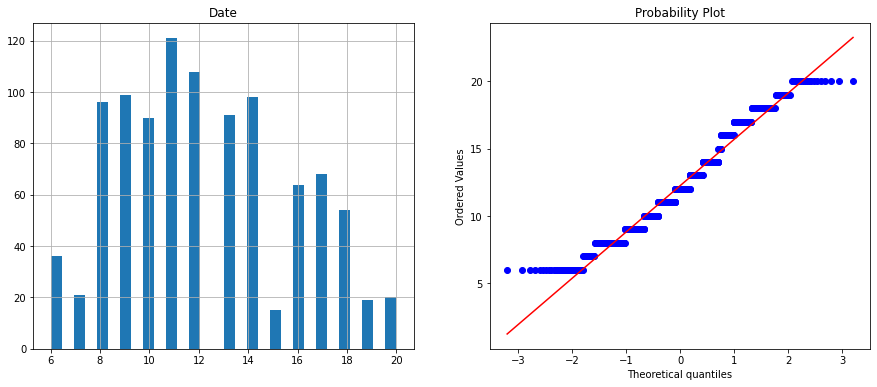

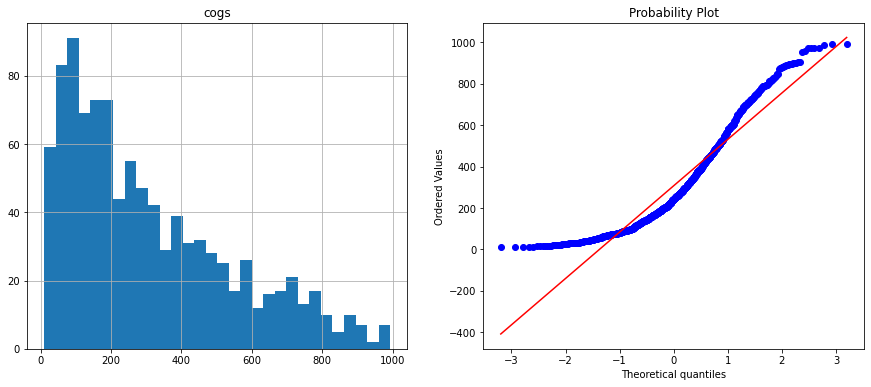

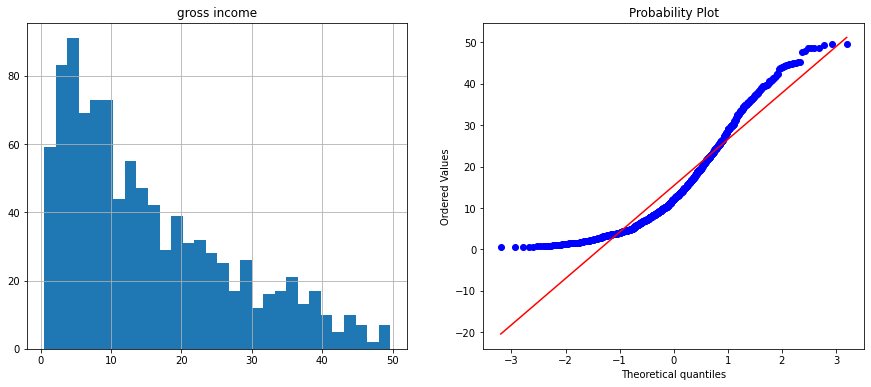

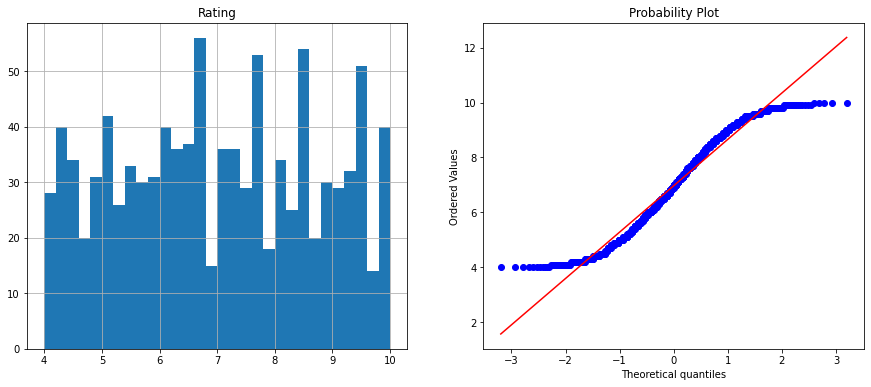

In [23]:
for col in numeric_cont_vars:
    mod.plot_density_variable(dataset_cvc, col)

### Función de Transformación de Variables

In [24]:
for col in numeric_cont_vars:
        pp.transfvnum(dataset_cvc, col,"Quantity")

Transformación de la columna Unit price con Polinomial 2
Transformación de la columna Tax 5% con Box Cox
Transformación de la columna Total con Box Cox
Transformación de la columna Date con Inversa
Transformación de la columna cogs con Box Cox
Transformación de la columna gross income con Box Cox
Transformación de la columna Rating con Inversa


In [25]:
dataset_tvn = dataset_cvc

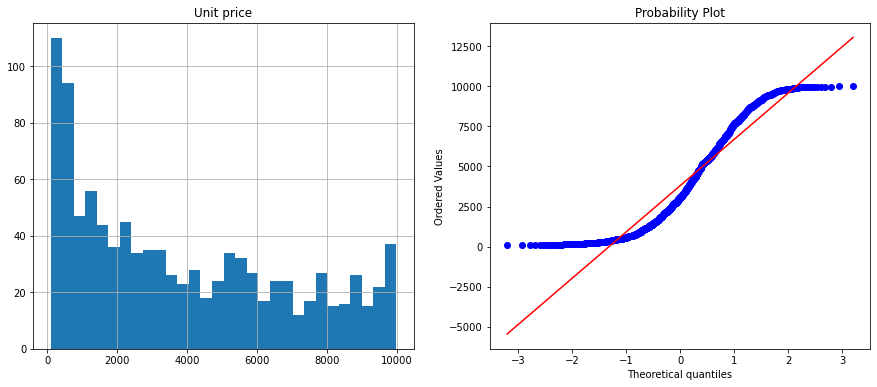

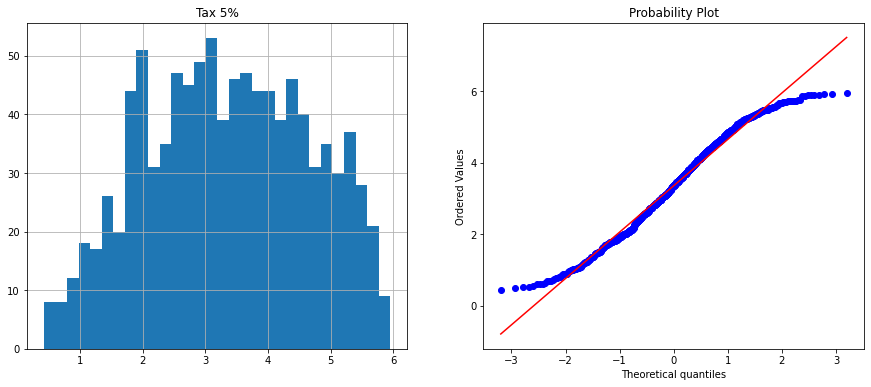

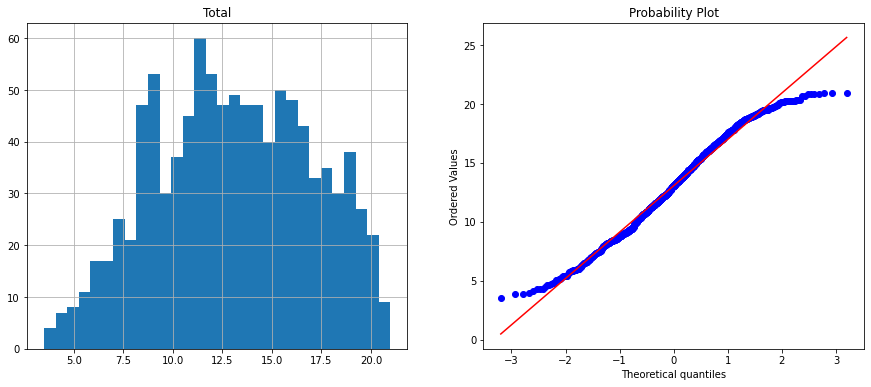

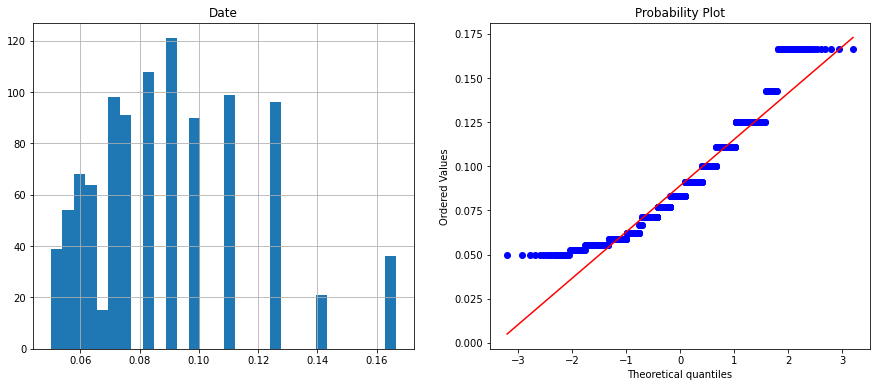

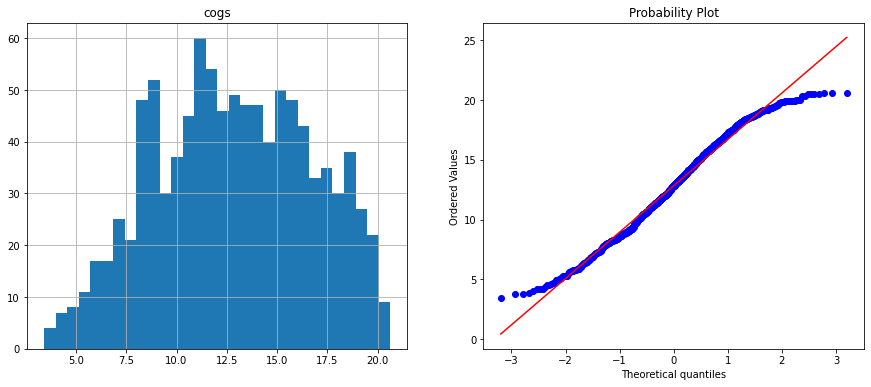

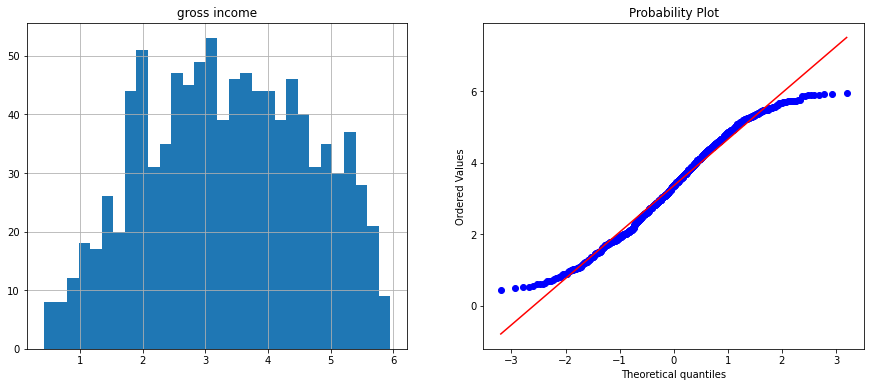

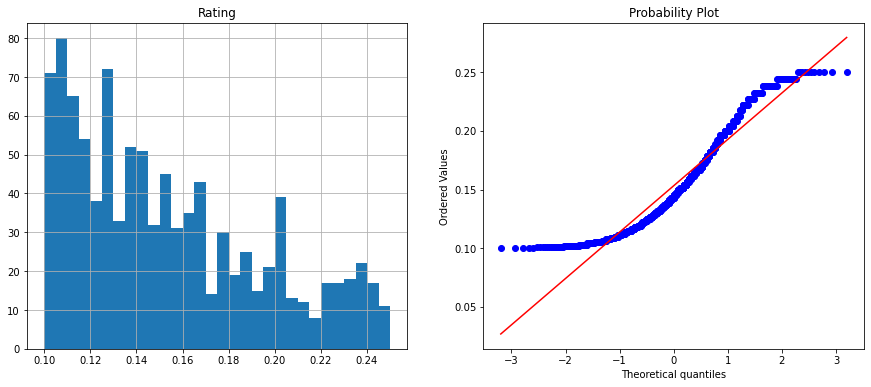

In [26]:
for col in numeric_cont_vars:
    mod.plot_density_variable(dataset_tvn, col)

In [27]:
dataset_tvn

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,1.0,340.0,340.0,501.0,501.0,152.0,5578.5961,7,4.666411,16.988515,0.083333,2.0,345.0,16.699459,4.761905,4.666411,0.109890
1,1.0,328.0,328.0,499.0,501.0,170.0,233.4784,5,1.846529,8.550651,0.090909,2.0,344.0,8.385446,4.761905,1.846529,0.104167
2,1.0,340.0,340.0,499.0,499.0,160.0,2146.4689,7,3.827228,14.455112,0.071429,3.0,311.0,14.203343,4.761905,3.827228,0.135135
3,1.0,340.0,340.0,501.0,499.0,152.0,3389.5684,8,4.454590,16.344292,0.071429,1.0,345.0,16.064734,4.761905,4.454590,0.119048
4,1.0,340.0,340.0,499.0,499.0,166.0,7449.4161,7,4.939389,17.823971,0.083333,3.0,345.0,17.522582,4.761905,4.939389,0.188679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,328.0,328.0,499.0,499.0,152.0,1628.1225,1,1.235110,6.618822,0.083333,3.0,345.0,6.482234,4.761905,1.235110,0.161290
996,1.0,332.0,332.0,499.0,501.0,160.0,9482.8644,10,5.905384,20.831234,0.055556,5.0,345.0,20.485296,4.761905,5.905384,0.227273
997,1.0,340.0,340.0,501.0,499.0,174.0,1013.7856,1,1.048608,5.988226,0.076923,4.0,344.0,5.861119,4.761905,1.048608,0.129870
998,1.0,340.0,340.0,499.0,499.0,160.0,4332.2724,1,1.689406,8.067444,0.090909,2.0,344.0,7.909357,4.761905,1.689406,0.243902


### Outliers

In [28]:
numeric_cont_vars

['Unit price', 'Tax 5%', 'Total', 'Date', 'cogs', 'gross income', 'Rating']

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


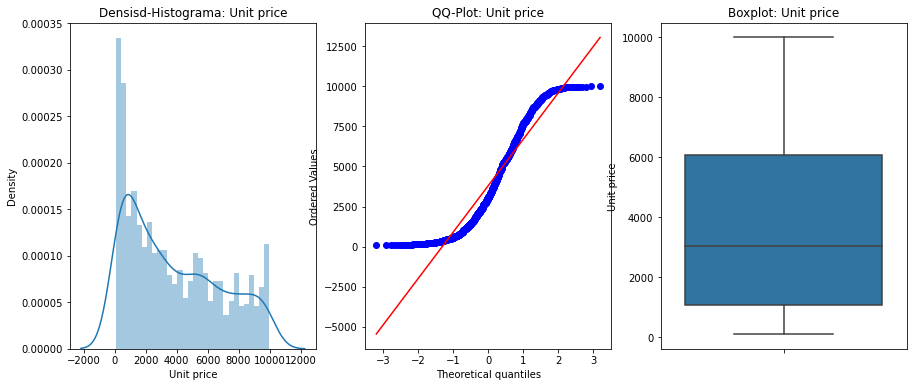

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


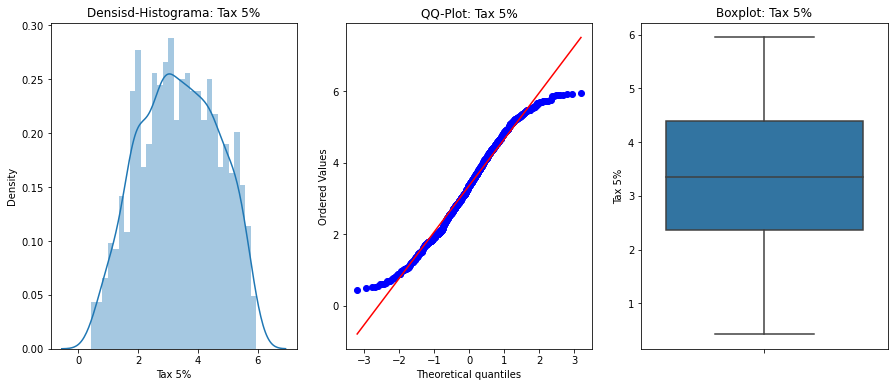

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


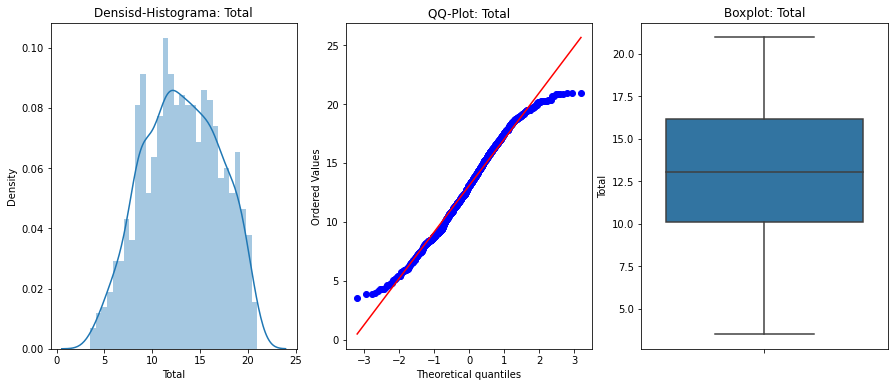

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


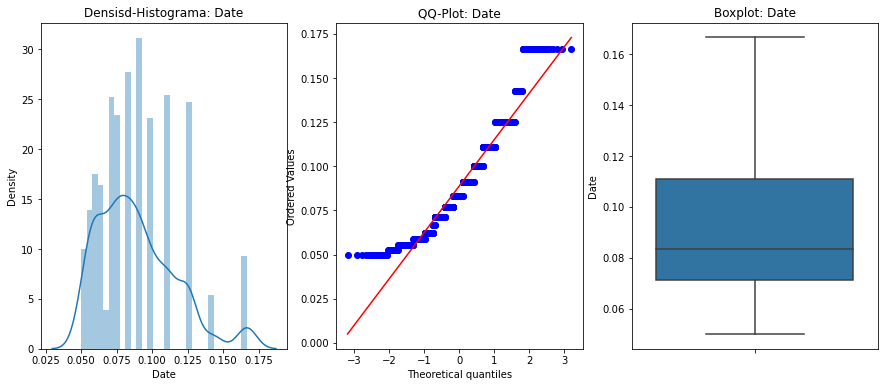

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


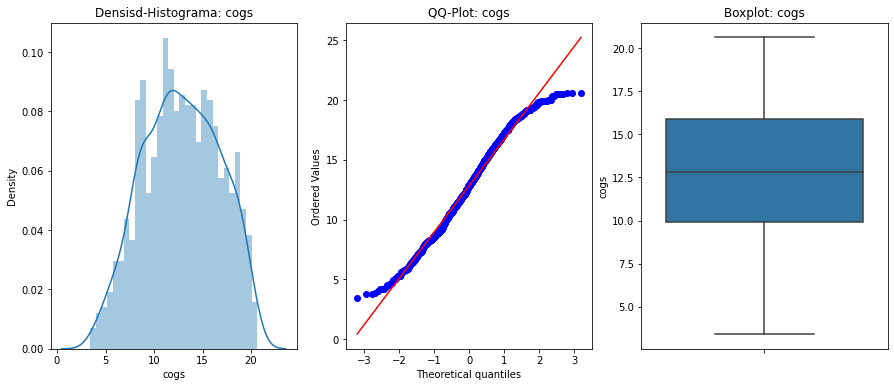

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


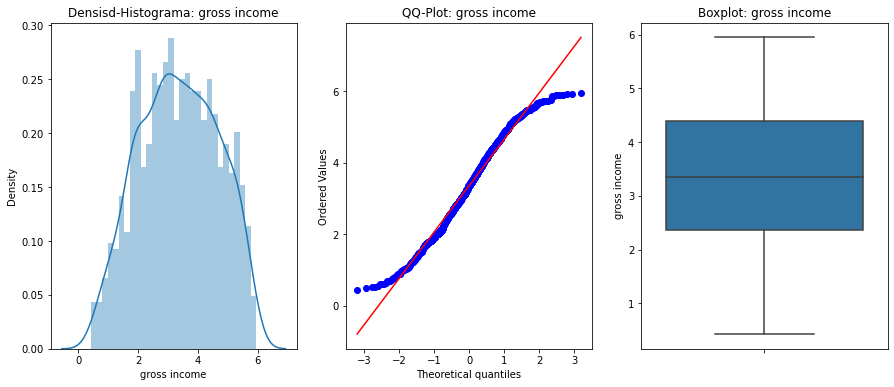

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


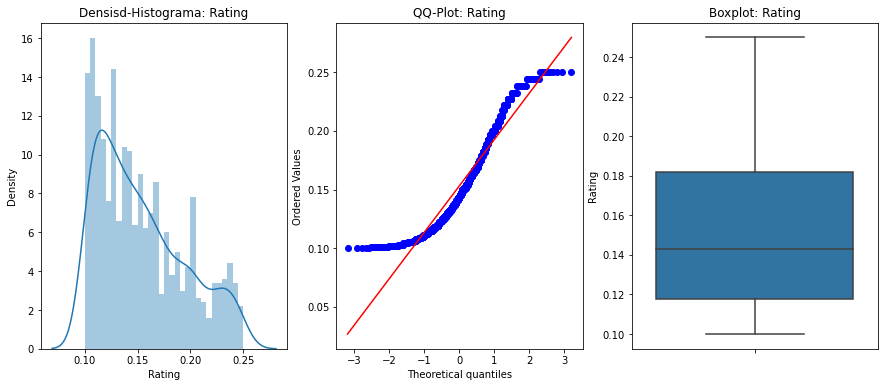

In [29]:
for col in numeric_cont_vars:
    mod.inspect_outliers(dataset_tvn, col)

In [30]:
for col in numeric_cont_vars:
    mod.detect_outliers(dataset_tvn, col, 1.75)

In [31]:
for col in numeric_cont_vars:
    pp.outlier_treatment(dataset_tvn, col, 1.75)

In [32]:
dataset_sca = dataset_tvn

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


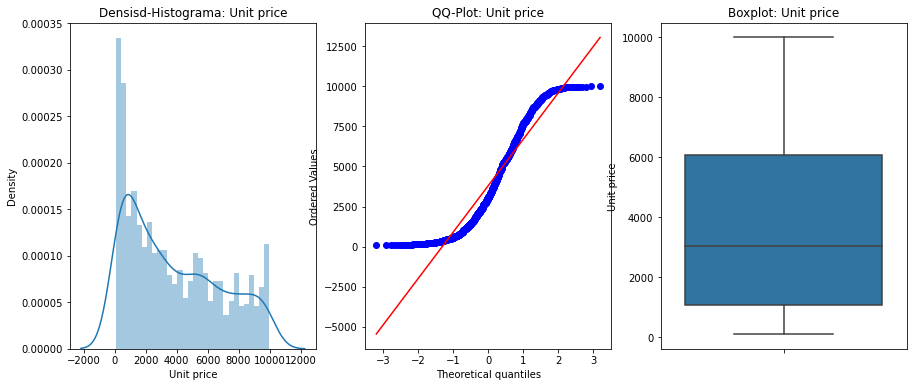

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


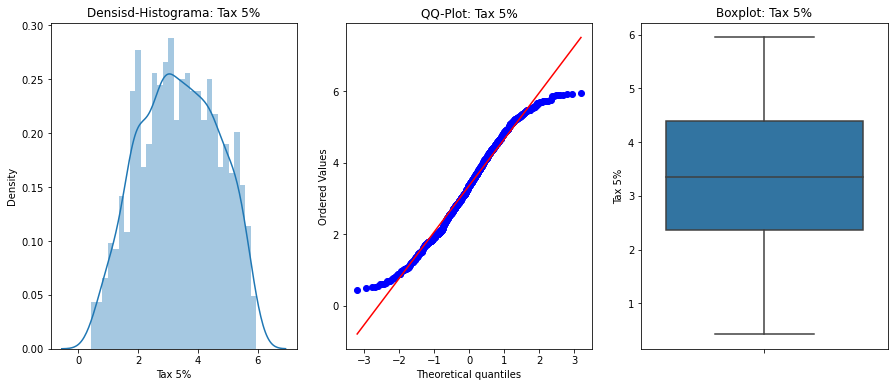

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


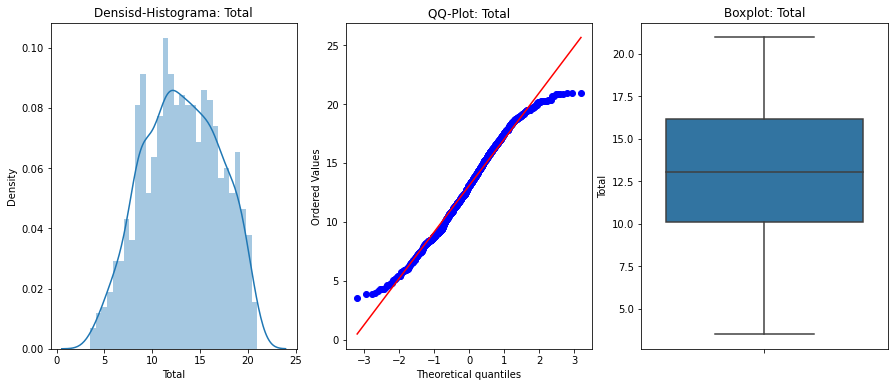

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


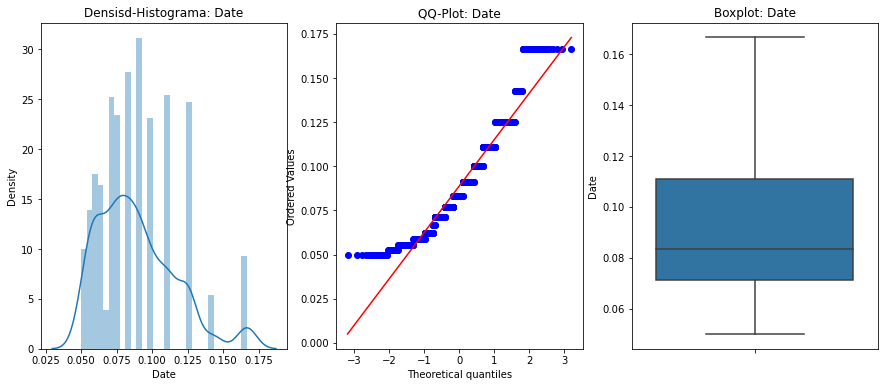

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


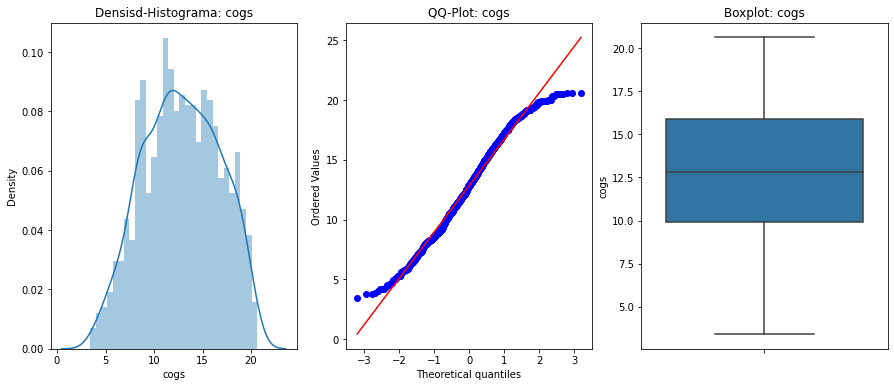

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


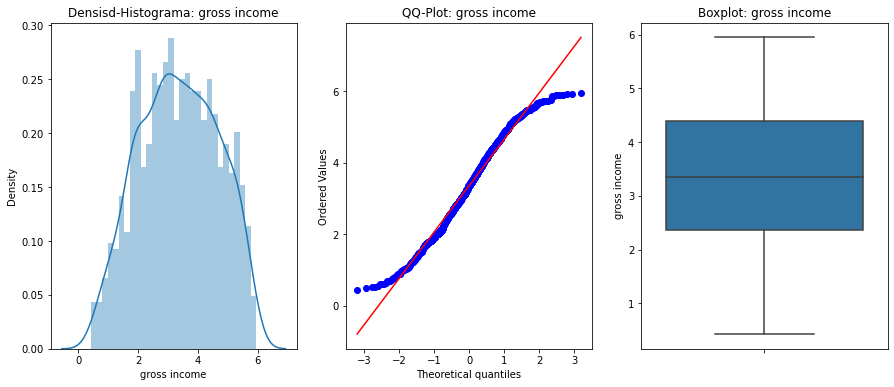

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


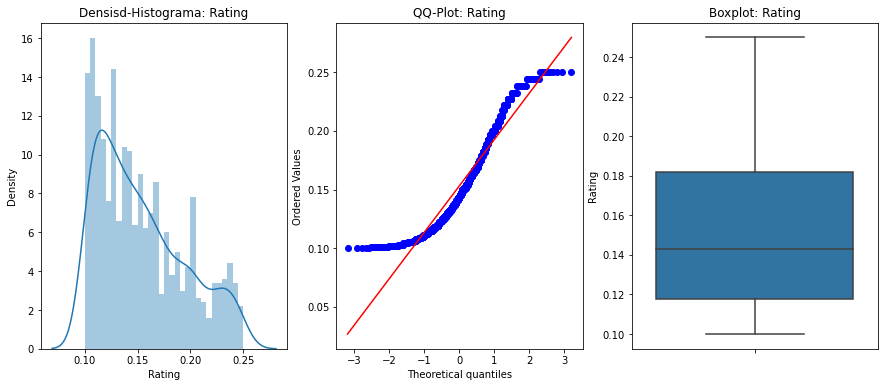

In [33]:
for col in numeric_cont_vars:
    mod.inspect_outliers(dataset_sca, col)

### Featuring Scaling

In [34]:
shape = dataset_sca.shape
dataset_sca[dataset_sca.columns[1:(shape[1])]]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,340.0,340.0,501.0,501.0,152.0,5578.5961,7,4.666411,16.988515,0.083333,2.0,345.0,16.699459,4.761905,4.666411,0.109890
1,328.0,328.0,499.0,501.0,170.0,233.4784,5,1.846529,8.550651,0.090909,2.0,344.0,8.385446,4.761905,1.846529,0.104167
2,340.0,340.0,499.0,499.0,160.0,2146.4689,7,3.827228,14.455112,0.071429,3.0,311.0,14.203343,4.761905,3.827228,0.135135
3,340.0,340.0,501.0,499.0,152.0,3389.5684,8,4.454590,16.344292,0.071429,1.0,345.0,16.064734,4.761905,4.454590,0.119048
4,340.0,340.0,499.0,499.0,166.0,7449.4161,7,4.939389,17.823971,0.083333,3.0,345.0,17.522582,4.761905,4.939389,0.188679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328.0,328.0,499.0,499.0,152.0,1628.1225,1,1.235110,6.618822,0.083333,3.0,345.0,6.482234,4.761905,1.235110,0.161290
996,332.0,332.0,499.0,501.0,160.0,9482.8644,10,5.905384,20.831234,0.055556,5.0,345.0,20.485296,4.761905,5.905384,0.227273
997,340.0,340.0,501.0,499.0,174.0,1013.7856,1,1.048608,5.988226,0.076923,4.0,344.0,5.861119,4.761905,1.048608,0.129870
998,340.0,340.0,499.0,499.0,160.0,4332.2724,1,1.689406,8.067444,0.090909,2.0,344.0,7.909357,4.761905,1.689406,0.243902


In [35]:
scaler = StandardScaler()
scaler.fit(dataset_sca) 

StandardScaler()

In [36]:
dataset_final = pd.DataFrame(scaler.transform(dataset_sca), columns=dataset_sca.columns)
#dataset_final = dataset_sca

In [37]:
np.round(dataset_final.describe(), 2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000.0,1000.00,1000.00,1000.0,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00
mean,0.0,-0.00,-0.00,-0.0,-0.0,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
std,0.0,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00
min,0.0,-1.08,-1.08,-1.0,-1.0,-1.76,-1.23,-1.54,-2.24,-2.42,-1.43,-1.23,-1.49,-2.41,0.0,-2.24,-1.30
25%,0.0,-1.08,-1.08,-1.0,-1.0,-0.83,-0.90,-0.86,-0.76,-0.75,-0.65,-0.45,-1.49,-0.75,0.0,-0.76,-0.87
50%,0.0,-0.28,-0.28,1.0,1.0,0.34,-0.25,-0.17,-0.00,-0.00,-0.21,-0.45,0.64,-0.00,0.0,-0.00,-0.25
75%,0.0,1.32,1.32,1.0,1.0,0.80,0.75,0.85,0.79,0.78,0.81,0.32,0.70,0.78,0.0,0.79,0.70
max,0.0,1.32,1.32,1.0,1.0,1.27,2.05,1.54,1.98,2.00,2.86,3.42,0.70,2.00,0.0,1.98,2.36


### Data Set Final

In [38]:
dataset_final['Quantity'] = dataset['Quantity']

In [39]:
dataset_final.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0.0,1.317727,1.317727,0.998002,0.998002,-1.760216,0.589141,7,1.000948,0.992744,-0.208379,-0.451003,0.703791,0.992769,0.0,1.000948,-1.056738
1,0.0,-1.081048,-1.081048,-1.002002,0.998002,0.335279,-1.182020,5,-1.158133,-1.141045,0.070203,-0.451003,0.639329,-1.141107,0.0,-1.158133,-1.196300
2,0.0,1.317727,1.317727,-1.002002,-1.002002,-0.828885,-0.548130,7,0.358416,0.352091,-0.646151,0.323917,-1.487901,0.352116,0.0,0.358416,-0.441155
3,0.0,1.317727,1.317727,0.998002,-1.002002,-1.760216,-0.136216,8,0.838765,0.829831,-0.646151,-1.225923,0.703791,0.829861,0.0,0.838765,-0.833438
4,0.0,1.317727,1.317727,-1.002002,-1.002002,-0.130386,1.209057,7,1.209957,1.204016,-0.208379,0.323917,0.703791,1.204032,0.0,1.209957,0.864482


In [40]:
pp.dfcorr(dataset_final, "Quantity" )

C:\Users\Ferickcen\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Ferickcen\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,Columna,Correlación
0,Invoice ID,NaN
1,Branch,1.000000
2,City,0.741045
3,Customer type,0.741044
4,Gender,0.740826
5,Product line,0.074258
6,Unit price,0.052807
7,Quantity,0.050567
8,Tax 5%,0.018082
9,Total,0.016763


In [41]:
dataset_final = dataset_final.drop(['Invoice ID', 'City', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income'], axis=1)
#dataset_final = dataset_final.drop(['Name','Ticket'], axis=1)


In [42]:
dataset_final

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating
0,1.317727,0.998002,0.998002,-1.760216,0.589141,7,0.992744,-0.208379,-0.451003,0.703791,-1.056738
1,-1.081048,-1.002002,0.998002,0.335279,-1.182020,5,-1.141045,0.070203,-0.451003,0.639329,-1.196300
2,1.317727,-1.002002,-1.002002,-0.828885,-0.548130,7,0.352091,-0.646151,0.323917,-1.487901,-0.441155
3,1.317727,0.998002,-1.002002,-1.760216,-0.136216,8,0.829831,-0.646151,-1.225923,0.703791,-0.833438
4,1.317727,-1.002002,-1.002002,-0.130386,1.209057,7,1.204016,-0.208379,0.323917,0.703791,0.864482
...,...,...,...,...,...,...,...,...,...,...,...
995,-1.081048,-1.002002,-1.002002,-1.760216,-0.719890,1,-1.629571,-0.208379,0.323917,0.703791,0.196622
996,-0.281456,-1.002002,0.998002,-0.828885,1.882862,10,1.964501,-1.229846,1.873757,0.703791,1.805559
997,1.317727,0.998002,-1.002002,0.800945,-0.923457,1,-1.789038,-0.444102,1.098837,0.639329,-0.569539
998,1.317727,-1.002002,-1.002002,-0.828885,0.176159,1,-1.263239,0.070203,-0.451003,0.639329,2.211063


### Conversión del dataframe a csv

In [43]:
dataset_final.to_csv("DataTrainF.csv")

### Correlación de las Variables

In [44]:
dataset_final.corr().to_csv("correlaciones.csv", encoding = 'UTF8')

PermissionError: [Errno 13] Permission denied: 'correlaciones.csv'